In [114]:
import numpy as np
from pylab import *
import fdmt
import boxcar
import simfrb
%matplotlib inline

nf = 256 # number of channels - must be a power of 2 currently.
fmax = 1448. +0.5#  Freuency of the top of the band in MHz
df = 1.0 # Channel bandwidth in MHz
fmin = fmax - nf*df # Frequency of the bottom of the band in MHz
nd = 1024 # Number of DM trials to do
nt = 256 # Number of samples per block
tsamp = 1.0 # milliseconds
reload(fdmt)
thefdmt = fdmt.Fdmt(fmin, df, nf, nd, nt, history_dtype=np.float32) # make FDMT
for i, s in enumerate(thefdmt.hist_state_shape):
    print 'Iteration', i, 'shape=', s, 'total elements=', s.prod()
print 'Init history shape', thefdmt.init_history.shape

Iteration 0 shape= [256   7 263] total elements= 471296
Iteration 1 shape= [128  12 268] total elements= 411648
Iteration 2 shape= [ 64  23 279] total elements= 410688
Iteration 3 shape= [ 32  44 300] total elements= 422400
Iteration 4 shape= [ 16  85 341] total elements= 463760
Iteration 5 shape= [  8 165 421] total elements= 555720
Iteration 6 shape= [  4 317 573] total elements= 726564
Iteration 7 shape= [  2 587 843] total elements= 989682
Iteration 8 shape= [   1 1024 1280] total elements= 1310720
Init history shape (256, 7)


In [115]:
thefdmt = fdmt.Fdmt(fmin, df, nf, nd, nt, history_dtype=np.float32) # make FDMT
ones = np.ones((nf, nt), dtype=np.float32)
f1 = thefdmt.initialise(ones)
f2 = thefdmt.initialise(ones)


(256, 7, 263)


(0, 10)

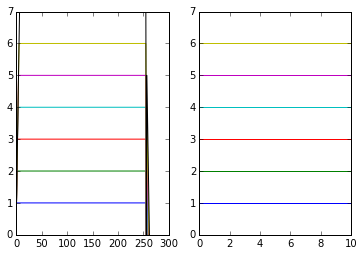

In [116]:
print(f1.shape)
fig, axs = subplots(1,2)
_ = axs[0].plot(f1[0, :, :].T)
_ = axs[1].plot(f2[0, :, :].T)
axs[1].set_xlim(0, 10)


(256, 7, 263)
Runs along? False


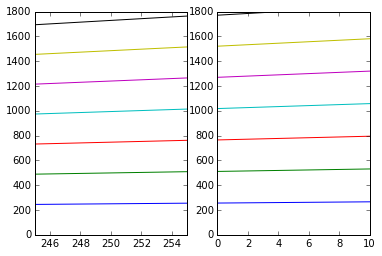

In [117]:
thefdmt = fdmt.Fdmt(fmin, df, nf, nd, nt, history_dtype=np.float32) # make FDMT
ramp = np.zeros((nf, nt*2), dtype=np.float32)
ramp[0, :] = np.arange(nt*2)
f1 = thefdmt.initialise(ramp[:, 0:nt])
f2 = thefdmt.initialise(ramp[:, nt:2*nt])
print(f1.shape)
fig, axs = subplots(1,2)
_ = axs[0].plot(f1[0, :, :nt].T)
_ = axs[1].plot(f2[0, :, :nt].T)
axs[0].set_xlim(255-10, 255)
axs[0].set_ylim(0, 1800)
axs[1].set_xlim(0, 10)
axs[1].set_ylim(0,1800)
print('Runs along?', np.all(f1[0, :, -1] +1 == f2[0, :, 0]))


In [118]:
print(f1.shape)
print(f1[0, :, nt-1])
print(f2[0, :, 0])

(256, 7, 263)
[ 255.  509.  762. 1014. 1265. 1515. 1764.]
[ 256.  511.  765. 1018. 1270. 1521. 1771.]
